## Intelligent Robotics Python Library 사용 예제 5 - Numerical Inverse Kinematics
## Written by 최동일, dongilc@mju.ac.kr
### BSD License.

In [1]:
import intelligent_robotics as ir
import sympy
import numpy as np
sympy.init_printing()

### 예제 5. 예제 3-8의 2-Link Planar 로봇의 역기구학

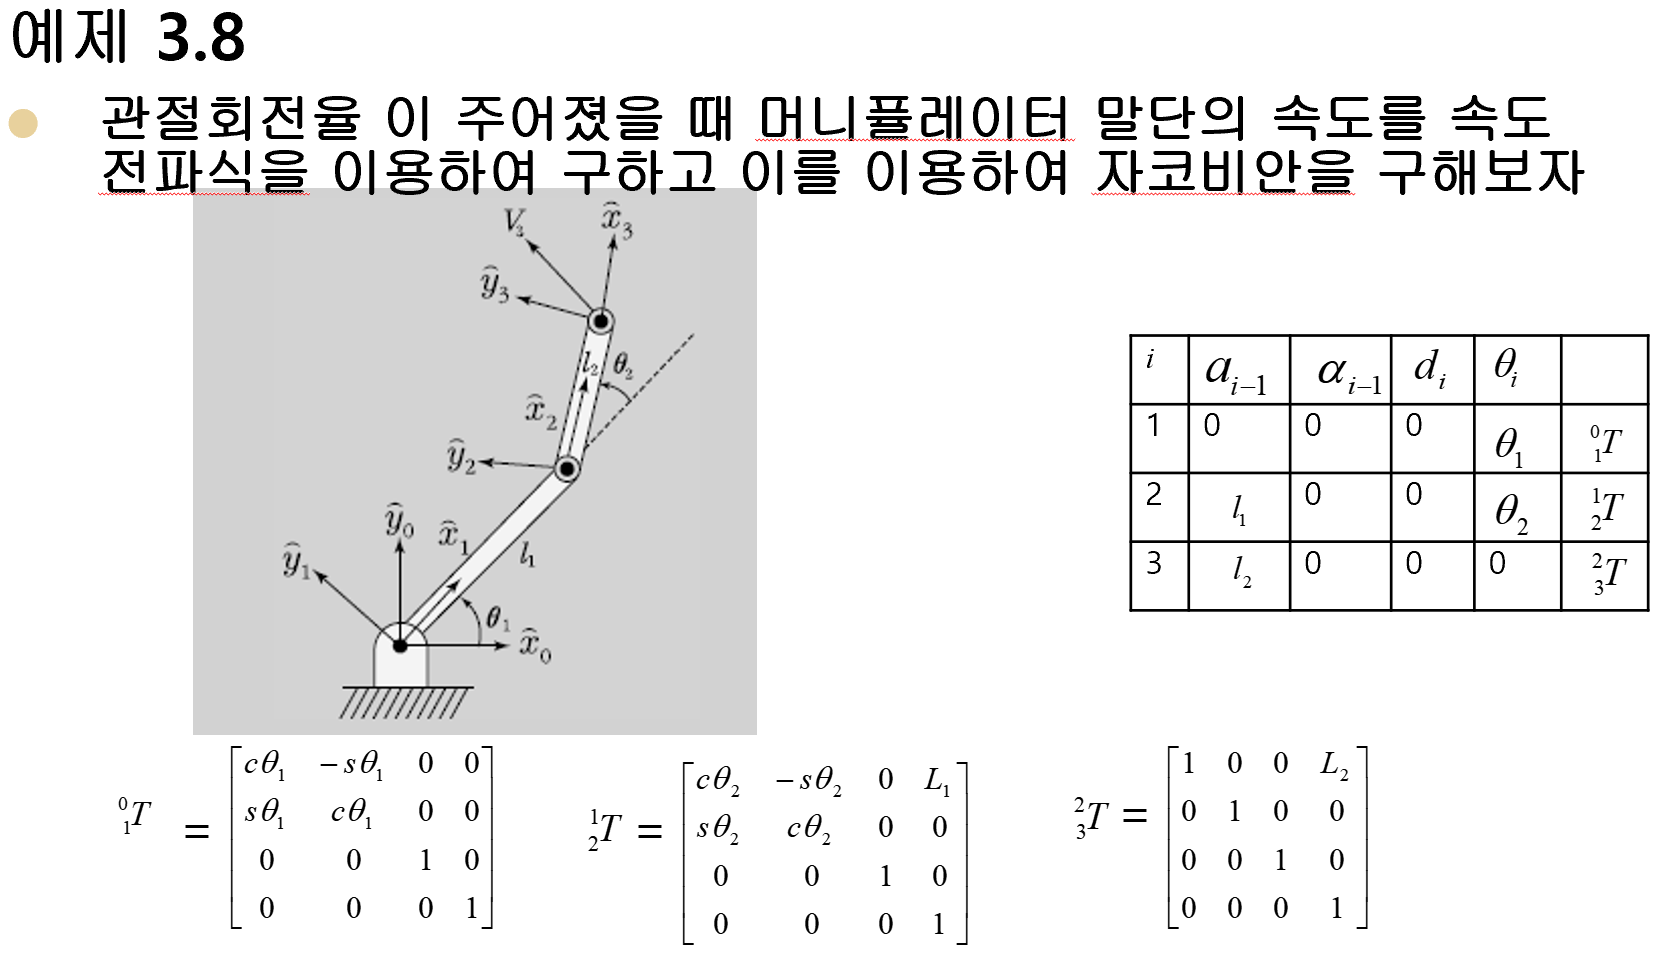

In [2]:
from IPython.display import Image
Image('figure/ex3.8_fig.PNG', width=700)

In [3]:
# 정기구학
theta1,theta2 = ir.dynamicsymbols('theta1,theta2')
l1,l2,x,y,phi = sympy.symbols('l1,l2,x,y,phi')
T01 = ir.DH(0,0,0,theta1)
T12 = ir.DH(l1,0,0,theta2)
T23 = ir.DH(l2,0,0,0)
T02 = sympy.simplify(T01*T12)
T03 = sympy.simplify(T01*T12*T23)

In [4]:
T03

⎡cos(θ₁(t) + θ₂(t))  -sin(θ₁(t) + θ₂(t))  0  l₁⋅cos(θ₁(t)) + l₂⋅cos(θ₁(t) + θ₂
⎢                                                                             
⎢sin(θ₁(t) + θ₂(t))  cos(θ₁(t) + θ₂(t))   0  l₁⋅sin(θ₁(t)) + l₂⋅sin(θ₁(t) + θ₂
⎢                                                                             
⎢        0                    0           1                    0              
⎢                                                                             
⎣        0                    0           0                    1              

(t))⎤
    ⎥
(t))⎥
    ⎥
    ⎥
    ⎥
    ⎦

In [5]:
# Jacobian
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,theta1.diff())
w_2_2 = ir.get_angular_vel_R(T12,w_1_1,theta2.diff())
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,0)

v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_R(T12,w_1_1,v_1_1)
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)

qd = sympy.Matrix([[theta1.diff()],[theta2.diff()]])

w_0_3 = ir.get_R_from_T(T01*T12*T23)*w_3_3
v_0_3 = ir.get_R_from_T(T01*T12*T23)*v_3_3
J_0_3 = ir.get_Jacobian_from_vel(w_0_3,v_0_3,qd)

# Space Jacobian
J_0_3

⎡-l₁⋅sin(θ₁(t)) - l₂⋅sin(θ₁(t) + θ₂(t))  -l₂⋅sin(θ₁(t) + θ₂(t))⎤
⎢                                                              ⎥
⎢l₁⋅cos(θ₁(t)) + l₂⋅cos(θ₁(t) + θ₂(t))   l₂⋅cos(θ₁(t) + θ₂(t)) ⎥
⎢                                                              ⎥
⎢                  0                               0           ⎥
⎢                                                              ⎥
⎢                  0                               0           ⎥
⎢                                                              ⎥
⎢                  0                               0           ⎥
⎢                                                              ⎥
⎣                  1                               1           ⎦

### Analytic Inverse Kinematics Solution

In [6]:
# Parameter

In [7]:
param = {l1:1,l2:1,x:-1.3,y:0.5}

In [8]:
import numpy as np
import math
cos_th2 = (x*x + y*y - (l1*l1 + l2*l2))/(2*l1*l2)
c2 = cos_th2.subs(param)
# th2 solution
th2_1 = math.atan2(math.sqrt(1-math.pow(c2,2)),c2)
th2_2 = math.atan2(-math.sqrt(1-math.pow(c2,2)),c2)
th2_sol = [th2_1, th2_2]

In [9]:
th2_sol, np.rad2deg(th2_sol)

([1.6008008286183735, -1.6008008286183735],
 array([ 91.71913132, -91.71913132]))

In [10]:
# th1 solution
c2,s2 = sympy.symbols('c2,s2')
cos_th1 = ((l1+l2*c2)*x+l2*s2*y)/(pow(l1+l2*c2,2)+pow(l2*s2,2))
sin_th1 = (-l2*s2*x+(l1+l2*c2)*y)/(pow(l1+l2*c2,2)+pow(l2*s2,2))
# solution 1
c2_1 = np.cos(th2_sol[0])
s2_1 = np.sin(th2_sol[0])
c1_1 = cos_th1.subs(param).subs({c2:c2_1,s2:s2_1})
s1_1 = sin_th1.subs(param).subs({c2:c2_1,s2:s2_1})
th1_1 = math.atan2(s1_1,c1_1)
# solution 2
c2_2 = np.cos(th2_sol[1])
s2_2 = np.sin(th2_sol[1])
c1_2 = cos_th1.subs(param).subs({c2:c2_2,s2:s2_2})
s1_2 = sin_th1.subs(param).subs({c2:c2_2,s2:s2_2})
th1_2 = math.atan2(s1_2,c1_2)
th1_sol = [th1_1, th1_2]

In [11]:
th1_sol, np.rad2deg(th1_sol)

([1.9740184054623873, -2.7083660730988255],
 array([ 113.10292331, -155.17794536]))

In [12]:
# Solution Set
th_1 = [th1_1, th2_1]
th_2 = [th1_2, th2_2]

In [13]:
# Elbow down solution in Degree
np.rad2deg(th_1)

array([113.10292331,  91.71913132])

In [14]:
# Elbow up solution in Degree
np.rad2deg(th_2)

array([-155.17794536,  -91.71913132])

## Plot

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Plot Two-Link Planar Robot by Position
def Plot_2Link_Robot_by_Position(x1,y1,x2,y2):
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.plot([0,x1],[0,y1],'r')
    ax.text(x1, y1, '(%.2f,%.2f)' % (x1,y1))
    ax.plot([x1,x2],[y1,y2],'b')
    ax.text(x2, y2, '(%.2f,%.2f)' % (x2,y2))
    ax.set_aspect('equal')
    
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.grid(True)
    plt.xticks(np.arange(-2, 2, step=0.5))
    plt.yticks(np.arange(-2, 2, step=0.5))

# Plot Two-Link Planar Robot by Angle
def Plot_2Link_Robot_by_Angle(l1,l2,th1,th2):
    x1 = l1*np.cos(th1)
    y1 = l1*np.sin(th1)
    x2 = l1*np.cos(th1) + l2*np.cos(th1+th2)
    y2 = l1*np.sin(th1) + l2*np.sin(th1+th2)
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.plot([0,x1],[0,y1],'r')
    ax.text(x1, y1, '(%.2f,%.2f)' % (x1,y1))
    ax.plot([x1,x2],[y1,y2],'b')
    ax.text(x2, y2, '(%.2f,%.2f)' % (x2,y2))
    ax.set_aspect('equal')
    
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    plt.grid(True)
    plt.xticks(np.arange(-2, 2, step=0.5))
    plt.yticks(np.arange(-2, 2, step=0.5))
    
# Get End-effector Position
def get_pos_2Link_Robot(l1,l2,th1,th2):
    x = l1*np.cos(th1) + l2*np.cos(th1+th2)
    y = l1*np.sin(th1) + l2*np.sin(th1+th2)
    return np.array([x,y])

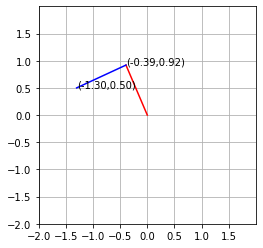

In [17]:
Plot_2Link_Robot_by_Angle(1,1,th_1[0],th_1[1])

## Numerical IK

In [18]:
J = J_0_3[0:2,0:2].subs({l1:1,l2:1})

In [19]:
J

⎡-sin(θ₁(t) + θ₂(t)) - sin(θ₁(t))  -sin(θ₁(t) + θ₂(t))⎤
⎢                                                     ⎥
⎣cos(θ₁(t) + θ₂(t)) + cos(θ₁(t))   cos(θ₁(t) + θ₂(t)) ⎦

In [20]:
func_J = sympy.lambdify([theta1,theta2],J,'numpy')
func_J

<function _lambdifygenerated(_Dummy_171, _Dummy_170)>

In [21]:
# 임의의 radian 결과값을 -pi에서 pi범위의 값으로 변환
def convert_radian_from_npi_to_pi(rad):
    ang = rad
    while math.fabs(ang) >= (np.pi):
        if ang>0:
            ang-=(np.pi*2)
        else:
            ang+=(np.pi*2)
    return ang

# 수치적 역기구학 푸는 함수
def numerical_IK(x_des,th_now):
    epsilon = 1e-10
    
    i=0
    theta = th_now
    err = x_des - get_pos_2Link_Robot(1,1,theta[0],theta[1])

    while (np.linalg.norm(err) > epsilon):
        J_now = func_J(theta[0],theta[1])
        m, n = J_now.shape
        if m > n:
            J_inv = np.linalg.inv((J_now.transpose() @ J_now)) @ J_now.transpose()
        if m < n:
            J_inv = J_now.transpose() @ np.linalg.inv((J_now @ J_now.transpose()))
        if m==n:
            J_inv = np.linalg.inv(J_now)
            
        theta = theta + J_inv@err
        for j in range(len(theta)):
            theta[j] = convert_radian_from_npi_to_pi(theta[j])
        err = x_des - get_pos_2Link_Robot(1,1,theta[0],theta[1])
        i+=1
        
    return theta

In [22]:
x_des = np.array([list(param.values())[2], list(param.values())[3]]) # desired value from target
theta_0 = np.array([-0.01, 0.01])
theta_sol = numerical_IK(x_des,theta_0)

In [23]:
np.degrees(theta_sol)

array([113.10292331,  91.71913132])

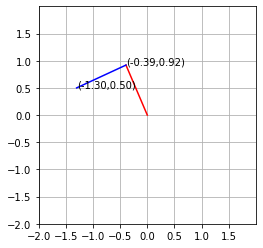

In [24]:
Plot_2Link_Robot_by_Angle(1,1,theta_sol[0],theta_sol[1])

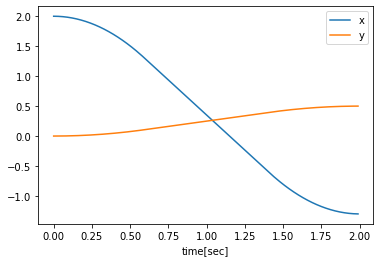

In [25]:
# Cartesian 좌표계 상에서의 trajectory 값을 찾아보자. 
# 가속도는 1.2 m/s2, 시간은 2초일때
time, traj = ir.Trapezoidal_Traj_Gen_Given_Amax_and_T(1.2, 2, 0.01)
x_traj = ir.Path_Gen(2,list(param.values())[2],traj[:,0])
y_traj = ir.Path_Gen(0,list(param.values())[3],traj[:,0])
plt.plot(time, x_traj, time, y_traj)
plt.legend(['x','y'])
plt.xlabel('time[sec]')
plt.show()

In [26]:
# Numerical Inverse Kinematic
import numpy
theta = numpy.array([0.001,0.001])
for index in range(len(time)):
    x_des = numpy.array([x_traj[index], y_traj[index]])
    theta = numerical_IK(x_des,theta)
    if index == 0:
        theta_store = theta
    else:
        theta_store = numpy.vstack([theta_store, theta])

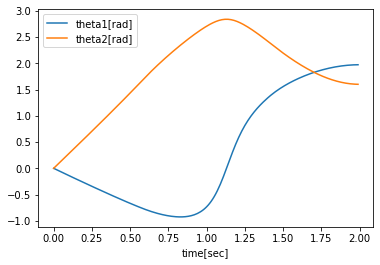

In [27]:
plt.plot(time, theta_store[:,0], time, theta_store[:,1])
plt.legend(['theta1[rad]','theta2[rad]'])
plt.xlabel('time[sec]')
plt.show()

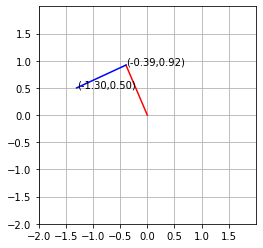

In [28]:
Plot_2Link_Robot_by_Angle(1,1,theta_store[200,0],theta_store[200,1])

In [29]:
theta_traj = numpy.degrees(theta_store)

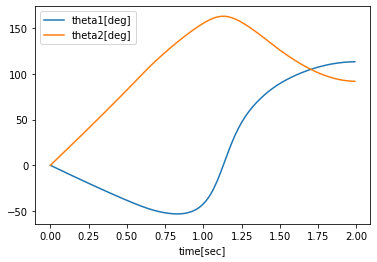

In [30]:
plt.plot(time, theta_traj[:,0], time, theta_traj[:,1])
plt.legend(['theta1[deg]','theta2[deg]'])
plt.xlabel('time[sec]')
plt.show()

In [31]:
import matplotlib.animation
from IPython.display import HTML

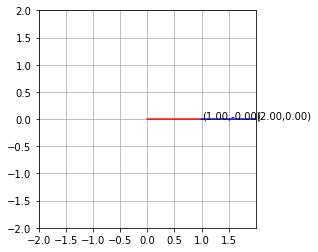

In [32]:
def update_figure(num):
    ax.cla()
    th1 = theta_store[num,0]
    th2 = theta_store[num,1]
    l1 = l2 =1
    x1 = l1*np.cos(th1)
    y1 = l1*np.sin(th1)
    x2 = l1*np.cos(th1) + l2*np.cos(th1+th2)
    y2 = l1*np.sin(th1) + l2*np.sin(th1+th2)
    ax.plot([0,x1],[0,y1],'r')
    ax.plot([x1,x2],[y1,y2],'b')
    ax.text(x1, y1, '(%.2f,%.2f)' % (x1,y1))
    ax.text(x2, y2, '(%.2f,%.2f)' % (x2,y2))
    ax.set_aspect('equal')
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    ax.grid(axis='both')
    ax.set_xticks(np.arange(-2, 2, step=0.5))
    ax.set_xticks(np.arange(-2, 2, step=0.5))

fig = plt.figure()
ax = fig.add_subplot(111)
ani = matplotlib.animation.FuncAnimation(fig, update_figure, 200, interval=10, blit=False)
HTML(ani.to_html5_video())